In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
housing_data = "master_data.csv"
housing_df = pd.read_csv(housing_data)


C:\Users\jgwak2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# this dataframe takes the columns we need for housing status vs freq of visits
housing_df=housing_df[["ClientId", "Housing Status", "Visits"]]

In [5]:
# this line inlcudes "core services"
# master_df=master_df[["ClientId", "Housing Status", "Core Services", "Visits"]]

In [6]:
housing_df.head()

,ClientId,Housing Status,Visits
0,1,Temporary,6.0
1,1,Temporary,22.0
2,1,Temporary,6.0
3,1,Temporary,22.0
4,1,Temporary,6.0


In [7]:
housing_df.drop_duplicates(inplace=True)
housing_df.head()

,ClientId,Housing Status,Visits
0,1,Temporary,6.0
1,1,Temporary,22.0
12,2,Stable/permanent,2.0
20,3,Stable/permanent,11.0
23,3,Stable/permanent,1.0


In [8]:
total_visits = housing_df.groupby(['ClientId']).sum()
total_visits.head()

,Visits
ClientId,
1,28.0
2,2.0
3,12.0
4,3.0
5,45.0


In [9]:
# this is a new table with clientid, housing status, and total visits dropping duplicates
merged_housing = pd.merge(total_visits, housing_df[['ClientId', 'Housing Status']], on='ClientId').drop_duplicates()
merged_housing.head()



,ClientId,Visits,Housing Status
0,1,28.0,Temporary
2,2,2.0,Stable/permanent
3,3,12.0,Stable/permanent
5,4,3.0,Stable/permanent
6,5,45.0,Stable/permanent


In [10]:
# this line is to find the total visits by stable, temp, and unstable 
grouped = merged_housing.groupby('Housing Status').count() #series[]
#grouped.loc['Temporary', 'Visits']
grouped

,ClientId,Visits
Housing Status,,
Stable/permanent,4019,4019
Temporary,540,540
Unstable,235,235


In [11]:
total_clients = len(total_visits)
total_clients

4794

In [12]:
# Labels for the sections of our pie chart
labels = ["Temp", "Stable/Perm", "Unstable"]

# The values of each section of the pie chart
sizes = [540, 4019 , 235]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

<IPython.core.display.Javascript object>


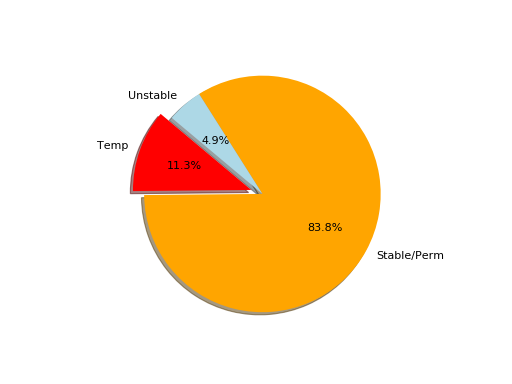

In [13]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

In [61]:
plt.savefig("piechart_housing.png")

In [14]:
# this line is find the total visits from all clients
merged_housing.sum()

ClientId                                                   11493615
Visits                                                        35430
Housing Status    TemporaryStable/permanentStable/permanentStabl...
dtype: object

In [15]:
# total visits from all clients in 2018 is 35,430

In [16]:
# total_visits_temporary
# total_visits_stable
# total_visits_unstable

In [17]:
merged_housing.head() 

,ClientId,Visits,Housing Status
0,1,28.0,Temporary
2,2,2.0,Stable/permanent
3,3,12.0,Stable/permanent
5,4,3.0,Stable/permanent
6,5,45.0,Stable/permanent


In [18]:
# take merged_housing and sum all stable/perm, sum of all temp, sum of all unstable

In [19]:
grouped

,ClientId,Visits
Housing Status,,
Stable/permanent,4019,4019
Temporary,540,540
Unstable,235,235


In [20]:
total_visits_status = merged_housing.groupby('Housing Status').sum()
total_visits_status

,ClientId,Visits
Housing Status,,
Stable/permanent,9335897,27806.0
Temporary,1449212,5096.0
Unstable,708506,2528.0


In [21]:
# calculate average visit by housing type
# bar graph
# save as png file all graphs

In [22]:
avg_stable = 6.918
avg_temp = 9.437
avg_unstable = 10.757

In [23]:
avg_visits = merged_housing.groupby('Housing Status').mean()
avg_visits

,ClientId,Visits
Housing Status,,
Stable/permanent,2322.940284,6.918636
Temporary,2683.725926,9.437037
Unstable,3014.919149,10.757447


In [24]:
temp1 = merged_housing.groupby('Housing Status').median()


In [25]:
temp1

,ClientId,Visits
Housing Status,,
Stable/permanent,2273,4.0
Temporary,2743,5.0
Unstable,3349,5.0


In [58]:
merged_housing.groupby('Housing Status').max()


,ClientId,Visits
Housing Status,,
Stable/permanent,4794,165.0
Temporary,4792,103.0
Unstable,4779,71.0


In [27]:
# this line determines what is the mode for each housing type

hello = merged_housing.groupby('Housing Status')['Visits'].apply(lambda x: x.mode().iloc[0])
hello.head(20)

Housing Status
Stable/permanent    2.0
Temporary           1.0
Unstable            1.0
Name: Visits, dtype: float64

In [28]:
# housing = [6.91, 9.43, 10.75]
# x_axis = np.arange(len(housing))

In [29]:
# # Tell matplotlib that we will be making a bar chart
# # Users is our y axis and x_axis is, of course, our x axis
# # We apply align="edge" to ensure our bars line up with our tick marks
# plt.bar(x_axis, housing, color='r', alpha=0.5, align="center")


In [30]:
# # Tell matplotlib where we would like to place each of our x axis headers
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ["Stable/Perm", "Temp", "Unstable"])

In [31]:
# housing = ["Stable/Perm", "Temp", "Unstable"]
# avg_visits = [6.91, 9.43, 10.75]
# x_axis = np.arange(len(avg_visits))

In [32]:
# # Create a bar chart based upon the above data
# plt.bar(x_axis, avg_visits, color="b", align="center")

In [33]:
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, housing)

In [34]:
# plt.title("Average Visits by Housing Status")
# plt.xlabel("Housing Status")
# plt.ylabel("Average Visits")

In [35]:
# plt.savefig("avgvisitsbyhousing.png")

In [36]:
# Set the limits of the x axis
#plt.xlim(-0.75, len(x_axis)-0.25)

In [37]:
#plt.ylim(0, max(avg_visits)+0.4)

In [42]:
housing = ["Stable:mean", "Stable:median", "Stable:mode", "Temp:mean", "Temp:median", "Temp:mode", "Unstable:mean", "Unstable:median", "Unstable:mode"]


avg_visits = [6.91, 4, 2, 9.43, 5, 1, 10.75, 5, 1]
x_axis = np.arange(len(avg_visits))

<IPython.core.display.Javascript object>


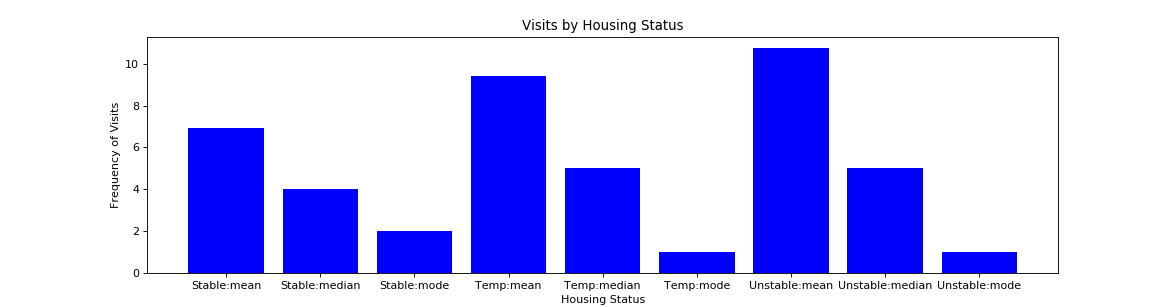

<BarContainer object of 9 artists>

In [52]:
plt.bar(x_axis, avg_visits, color="b", align="center")

In [53]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, housing)


([<matplotlib.axis.XTick at 0x249abb30588>,
 <a list of 9 Text xticklabel objects>)

In [54]:
plt.title("Visits by Housing Status")
plt.xlabel("Housing Status")
plt.ylabel("Frequency of Visits")

Text(37.77777854932679, 0.5, 'Frequency of Visits')

In [60]:
 plt.savefig("barchart_housing.png")